# **SVM**
---
##Author: Emmanuel Paalam
##V2: MICEV2 processing
##Target variable: F3EVERDO

###Import datasets

In [24]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Load the transformed data
X_train = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/X_train_MICEimputed.csv')
X_test = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/X_test_MICEimputed.csv')
y_train = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/y_MICEtrain.csv')
y_test = pd.read_csv('/content/drive/My Drive/research/SURP 2024/colab/data/processed/y_MICEtest.csv')
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(10495, 211), (2624, 211), (10495, 1), (2624, 1)


## Develop model

### 5-fold cross-validation

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(kernel='linear', random_state=71)

In [27]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X_train, np.ravel(y_train), scoring=scoring, cv=10, return_train_score=False)

print("Cross-validation results:")
print("  Accuracy: {:.2f}".format(cv_results['test_accuracy'].mean()))
print("  Precision: {:.2f}".format(cv_results['test_precision_weighted'].mean()))
print("  Recall: {:.2f}".format(cv_results['test_recall_weighted'].mean()))
print("  F1-score: {:.2f}".format(cv_results['test_f1_weighted'].mean()))

Cross-validation results:
  Accuracy: 0.90
  Precision: 0.88
  Recall: 0.90
  F1-score: 0.87


###Train, test, and evaluate final model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9043445121951219
Precision: 0.6792452830188679
Recall: 0.13333333333333333
F1 Score: 0.22291021671826625
Specificity: 0.9927782497875955
Test Negative Predictive Value (NPV): 0.9089848308051341
Confusion Matrix:
[[2337   17]
 [ 234   36]]


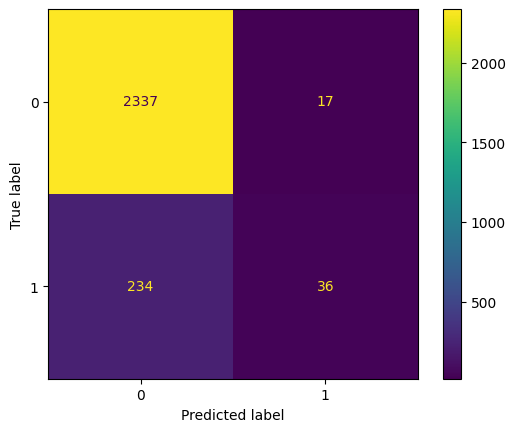

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
test_npv = tn / (tn + fn)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Specificity: {specificity}")
print(f'Test Negative Predictive Value (NPV): {test_npv}')
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()